# Basic Relationships between different baseball statistics

As a function of season.

In [35]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

#
from scipy import stats
import scipy

In [2]:
import hittingpredictor as hp

In [3]:
df = hp.scrape_year(year=2019,cat='bat',verbose=0)

In [4]:
# filter by some number of plate appearances?



In [13]:
np.array(df['PA']).astype('float')

array([nan, nan,  2., ...,  1.,  0.,  0.])

In [22]:
cleanx = np.array(df[categories[i]]).astype('float')
cleany = np.array(df[categories[j]]).astype('float')
w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
print(slope)


0.8907794784558726


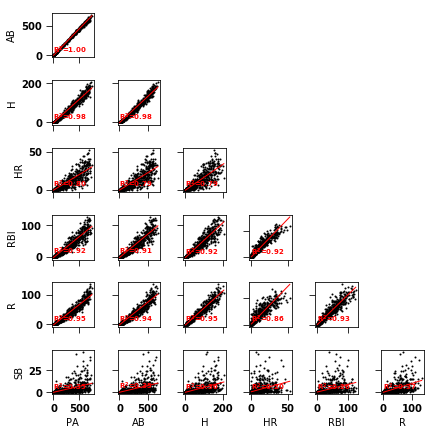

In [25]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

In [31]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)



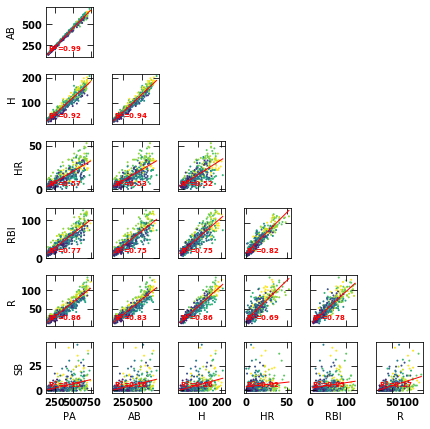

In [43]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('battingcorrelations.png')

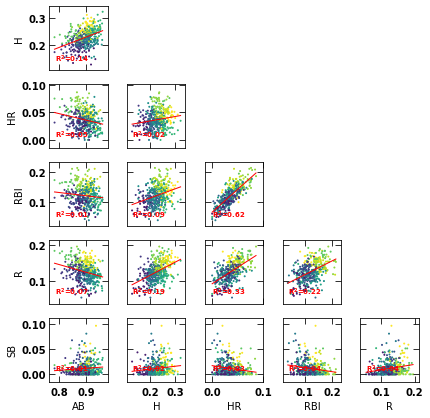

In [42]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['PA']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('battingcorrelations_normalized.png')

## Part 2: Pitching Correlations

In [27]:
import pitchingpredictor as pp

In [28]:
df = pp.scrape_year(year=2019,cat='pit',verbose=0)

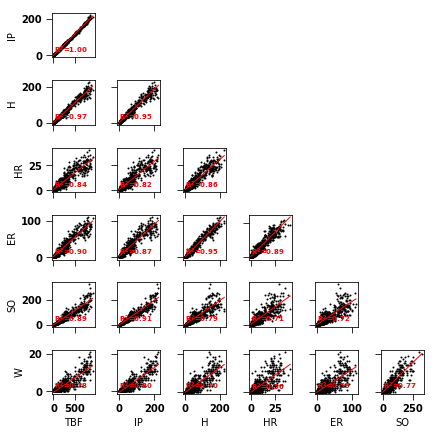

In [30]:
categories = ['TBF','IP','H','HR','ER','SO','W']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

In [50]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,pitching_cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




In [51]:
df.columns

Index(['#', 'Name', 'Team', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO', 'Year', 'HR.Normalize', 'ER.Normalize',
       'BB.Normalize', 'H.Normalize', 'SO.Normalize', 'Clusters',
       'Value Cluster'],
      dtype='object')

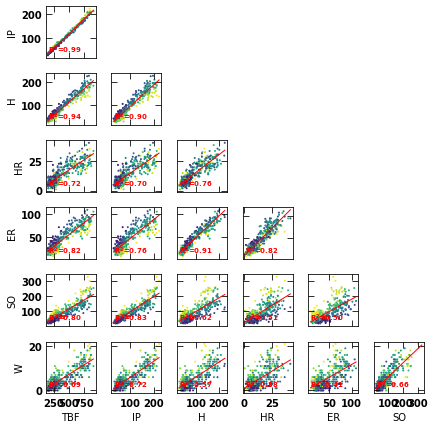

In [52]:
categories = ['TBF','IP','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('pitchingcorrelations.png')

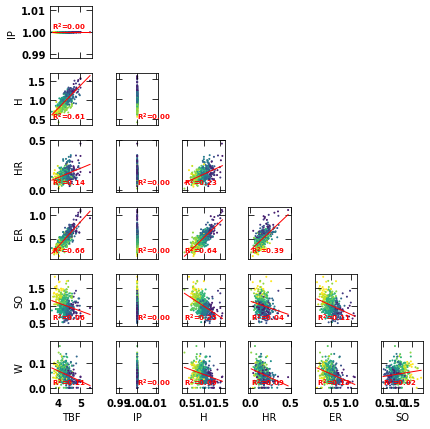

In [53]:
categories = ['TBF','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['IP']).astype('float')
    w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('pitchingcorrelations_normalized.png')